In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [2]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

In [3]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M

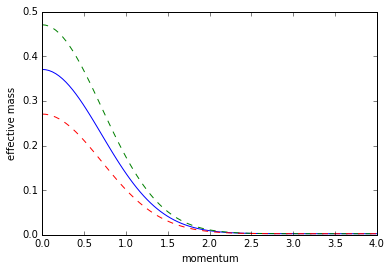

In [4]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective mass')
plt.xlabel('momentum')
plt.plot(x_range, [mstar(x,0.368) for x in x_range],x_range, [mstar(y,0.468) for y in x_range],'--',x_range, [mstar(z,0.268) for z in x_range],'--')

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

In [5]:
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E

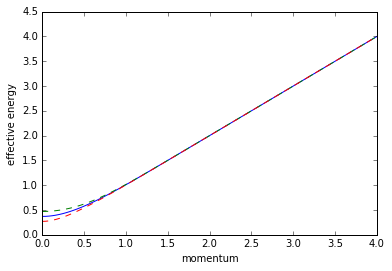

In [6]:
x_range = np.linspace(0, 4, 100)
plt.ylabel('effective energy')
plt.xlabel('momentum')
plt.plot(x_range, [E(x,0.368) for x in x_range],x_range, [E(y,0.468) for y in x_range],'--',x_range, [E(z,0.268) for z in x_range],'--')

$||\frac{\partial \Omega}{\partial\phi}||=|\ \phi-\frac{12\cdot3.881}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}(1-\frac{2}{e^{E(x,\phi)/T}+1})|$

In [40]:
def integrand(x,phi,T):
    Func=12*3.881/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-2*math.exp(-E(x,phi)/T)/(math.exp(-E(x,phi)/T)+1))
    return Func

In [41]:
def Norm(phi,x0,T):
    N,err=integrate.quad(integrand,0,x0,args=(phi,T))
    N=phi-N
    return abs(N)
#minimum is in 0.368

Let's find $\phi(\mu=0,T=0)$

In [55]:
z=optimize.minimize(Norm,0.3,args=(np.inf,0), tol=1e-14)
z.x[0]

0.36801804508311897

Let's plot $\phi(\mu=0,T)$

In [76]:
x_range=np.linspace(0,1,100)
z=[optimize.minimize(Norm,0.3,args=(np.inf,a), tol=1e-14).x[0] for a in x_range]

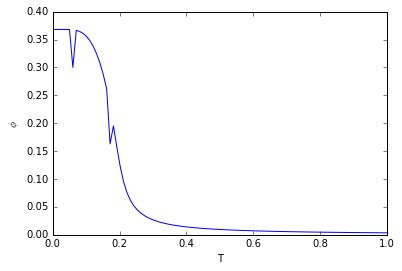

In [77]:
x_range=np.linspace(0,1,100)
plt.ylabel('$\phi$')
plt.xlabel('T')
plt.plot(x_range,z)

I dunno why exist this pits.

Let's find $x_{fermi}$ for solving $\phi(\mu\neq 0)$

In [64]:
def x_fermi(mu,phi):
    Func= lambda x: abs(E(x,phi)-mu)
    zz=optimize.fsolve(Func,1,xtol=1e-14)
    return zz[0]

In [80]:
E(x_fermi(0.40,0.368),0.368)

0.39999999999999997

$T=0,\ \mu>\phi+m$

In [92]:
#z=[optimize.minimize(Norm,0.3,args=(x_fermi(x_fermi(a,z[a])),0), tol=1e-14).x[0] for a in x_range]

TypeError: list indices must be integers or slices, not numpy.float64

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


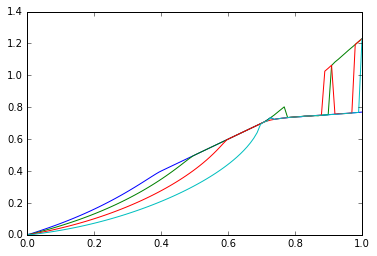

In [87]:
x_range=np.linspace(0,1,100)
plt.plot(x_range,[Norm(x,x_fermi(0.4,x),0) for x in x_range])
plt.plot(x_range,[Norm(x,x_fermi(0.5,x),0) for x in x_range])
plt.plot(x_range,[Norm(x,x_fermi(0.6,x),0) for x in x_range])
plt.plot(x_range,[Norm(x,x_fermi(0.7,x),0) for x in x_range])
